In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)

In [3]:


# Load the datasets
exercise_data = pd.read_csv('exercise.csv')
calories_data = pd.read_csv('calories.csv')

# Display the first few rows of each dataset to understand their structure
exercise_data.head(), calories_data.head()


(    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
 0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
 1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
 2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
 3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
 4  17771927  female   27   154.0    58.0      10.0        81.0       39.8,
     User_ID  Calories
 0  14733363     231.0
 1  14861698      66.0
 2  11179863      26.0
 3  16180408      71.0
 4  17771927      35.0)

In [4]:
# Merge the datasets on 'User_ID'
merged_data = pd.merge(exercise_data, calories_data, on='User_ID')

# Drop 'User_ID' since it's not needed for model training
merged_data = merged_data.drop(columns=['User_ID'])

# Display the first few rows of the merged dataset to confirm the merge
merged_data.head()


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [5]:
merged_data.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


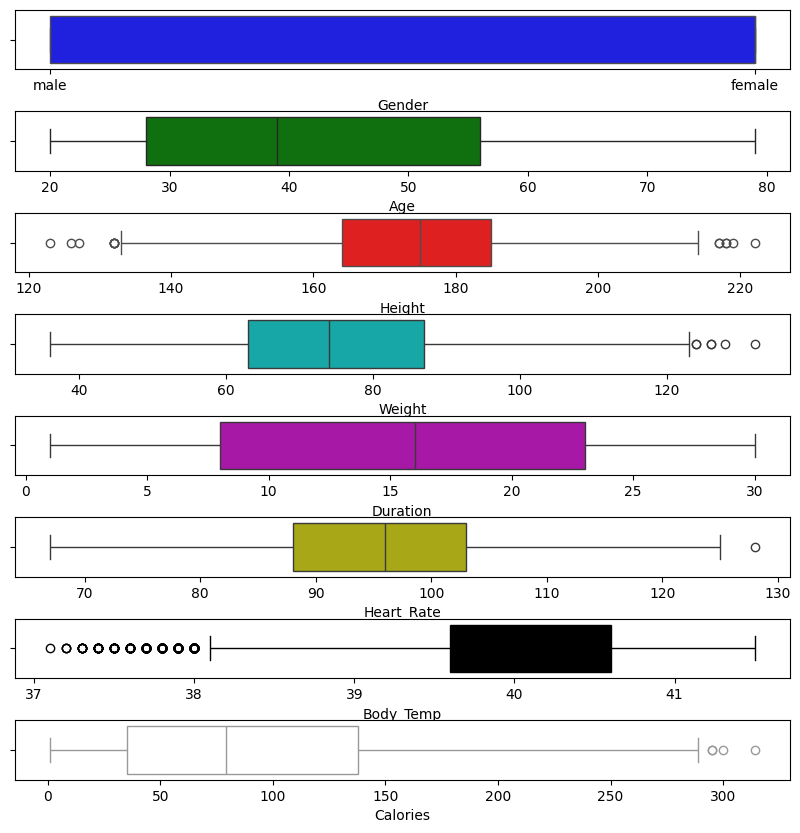

In [6]:
#visualizes the distribution and potential outliers for each column in the dataset using box plots.
c = ['b' , 'g' , 'r' , 'c' , 'm' , 'y' , 'k' , 'w' , 'b']
# Create a figure and a grid of subplots, with one subplot for each column in the dataset
# The size of the figure is set to 10x10 inches
fig1 , axes = plt.subplots(len(merged_data.columns) , 1 , figsize = (10 , 10))
plt.subplots_adjust(wspace = 0.3 , hspace = 0.7)
axes = axes.flatten()             #for using axes indeces with one dimention array instead of two dimension
for i , column in zip(range(len(merged_data.columns)) , merged_data.columns):
  try:
    sns.boxplot(data = merged_data , x = column , color = c[i] , ax = axes[i])
  except:
    fig1.delaxes(axes[i])
    continue

The box plots provide insights into the distribution of various features in the dataset. Gender is represented as a categorical variable, while the other features show their ranges, central tendencies, and potential outliers. Age and Height have relatively symmetric distributions but exhibit outliers at the higher end. Weight and Calories have a wider range, with multiple outliers indicating significantly higher values. Duration shows a broad variability, with most values clustered between 80 and 120. Heart Rate and Body Temperature are more consistent, with narrow ranges, but Heart Rate has noticeable outliers on the lower end. Overall, the presence of outliers and skewed distributions in features like Weight, Calories, and Heart Rate suggests the need for careful preprocessing, such as normalization or outlier handling, to improve model performance.

In [7]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


In [8]:
merged_data.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [9]:
print("The shape of dataset before dropping duplicates : " , merged_data.shape)
merged_data.drop_duplicates( inplace = True)    
print("The shape of dataset after dropping duplicates : " , merged_data.shape)

The shape of dataset before dropping duplicates :  (15000, 8)
The shape of dataset after dropping duplicates :  (14999, 8)


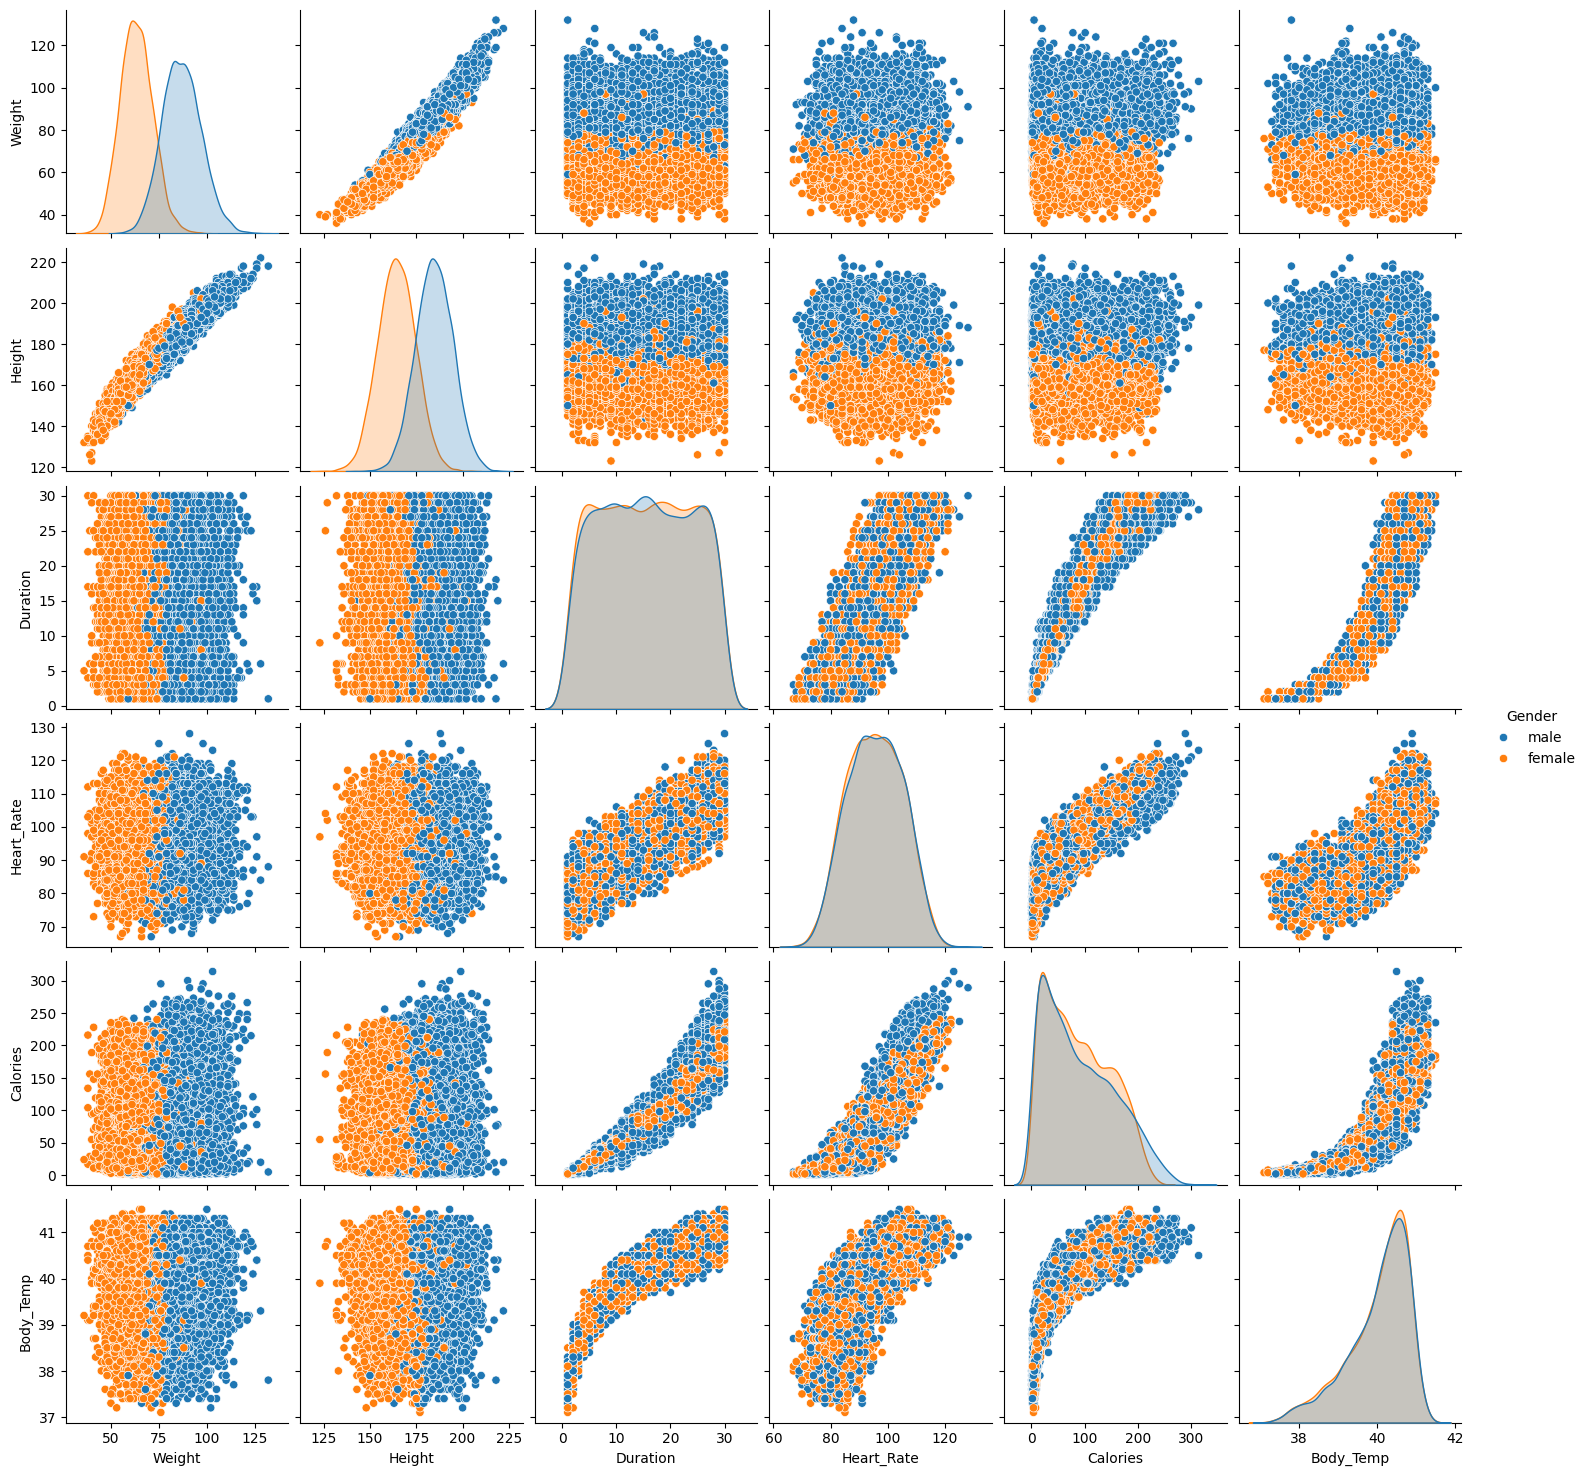

In [10]:
sns.pairplot(merged_data[["Weight" , "Height" , "Duration" , "Heart_Rate" , "Calories" , "Gender","Body_Temp"]] , hue = "Gender")

* As we can see from graphs above, there is not a specific correlation or relationship between most of the features in the dataset.For example,there is not a specific relationship between `Duration` and `Weight` or between `Duration` and `Hight`.This is because exercisers may have different exercise duration no matter of their `Weight` and `Height`.

* In some cases, a featrue has a low relationship with another feature, like `Duration` and `Heart_Rate`.Somehow(with low confident) we can say that the more time somebody exercises the more 'Heart Rate' per minute he/she will have.

* In some cases , two featrues have a high relationship(in compare to last two cases), like `Height` and `Weight`.
.

### Building Model Model and Decide the best performing one

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode the 'Gender' feature
label_encoder = LabelEncoder()
merged_data['Gender'] = label_encoder.fit_transform(merged_data['Gender'])

# Split the dataset into features and target
X = merged_data.drop(columns=['Calories'])
y = merged_data['Calories']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the shapes of the processed training and testing sets
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape


((11999, 7), (3000, 7), (11999,), (3000,))

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
import numpy as np

# Define a function to calculate regression accuracy (e.g., within 10% tolerance)
def calculate_accuracy(y_true, y_pred, tolerance=0.1):
    within_tolerance = abs(y_true - y_pred) <= tolerance * y_true
    return sum(within_tolerance) / len(y_true) * 100

# Custom scoring function for cross-validation
def accuracy_scorer(y_true, y_pred):
    return calculate_accuracy(y_true, y_pred)

# Initialize models
linear_regressor = LinearRegression()
random_forest_regressor = RandomForestRegressor(random_state=42)
gradient_boosting_regressor = GradientBoostingRegressor(
    n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42
)
svm_regressor = SVR(kernel="rbf", C=10, epsilon=0.1)
xgboost_regressor = XGBRegressor(
    n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42
)

# Cross-validation function
def cross_validate_model(model, X, y, cv=5):
    mse_scores = -cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=cv)
    r2_scores = cross_val_score(model, X, y, scoring="r2", cv=cv)
    return np.mean(mse_scores), np.mean(r2_scores)

# Evaluate models using cross-validation and train-test split
models = {
    "Linear Regression": linear_regressor,
    "Random Forest": random_forest_regressor,
    "Gradient Boosting": gradient_boosting_regressor,
    "SVM": svm_regressor,
    "XGBoost": xgboost_regressor,
}

# To store metrics for each model
mse_values = []
r2_values = []
accuracies=[]

results = {}

for model_name, model in models.items():
    # Cross-validation
    mse_cv, r2_cv = cross_validate_model(model, X_train_scaled, y_train, cv=5)
    
    # Train-test split
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = calculate_accuracy(y_test, y_pred)
    
    # Store MSE and R2 for plotting later
    mse_values.append(mse)
    r2_values.append(r2)
    accuracies.append(accuracy)
    
    # Save results
    results[model_name] = {
        "MSE (Cross-Validation)": mse_cv,
        "R2 (Cross-Validation)": r2_cv,
        "MSE (Test)": mse,
        "R2 (Test)": r2,
        "Accuracy (%) (Test)": accuracy,
    }

# Print results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")
    print()

# Print mse_values and r2_values to verify
print("MSE Values:", mse_values)
print("R² Values:", r2_values)


Linear Regression:
  MSE (Cross-Validation): 127.5470
  R2 (Cross-Validation): 0.9673
  MSE (Test): 130.5644
  R2 (Test): 0.9663
  Accuracy (%) (Test): 55.6000

Random Forest:
  MSE (Cross-Validation): 9.3082
  R2 (Cross-Validation): 0.9976
  MSE (Test): 8.5134
  R2 (Test): 0.9978
  Accuracy (%) (Test): 96.4667

Gradient Boosting:
  MSE (Cross-Validation): 2.8939
  R2 (Cross-Validation): 0.9993
  MSE (Test): 2.7947
  R2 (Test): 0.9993
  Accuracy (%) (Test): 98.1333

SVM:
  MSE (Cross-Validation): 2.9320
  R2 (Cross-Validation): 0.9993
  MSE (Test): 2.7442
  R2 (Test): 0.9993
  Accuracy (%) (Test): 97.4000

XGBoost:
  MSE (Cross-Validation): 3.0204
  R2 (Cross-Validation): 0.9992
  MSE (Test): 2.8274
  R2 (Test): 0.9993
  Accuracy (%) (Test): 98.0333

MSE Values: [130.5644224133618, 8.513416033333334, 2.794656724647676, 2.7441685068892165, 2.8273718639270573]
R² Values: [0.9662893783275958, 0.9978019085005342, 0.9992784434395874, 0.9992914790673358, 0.9992699966693048]


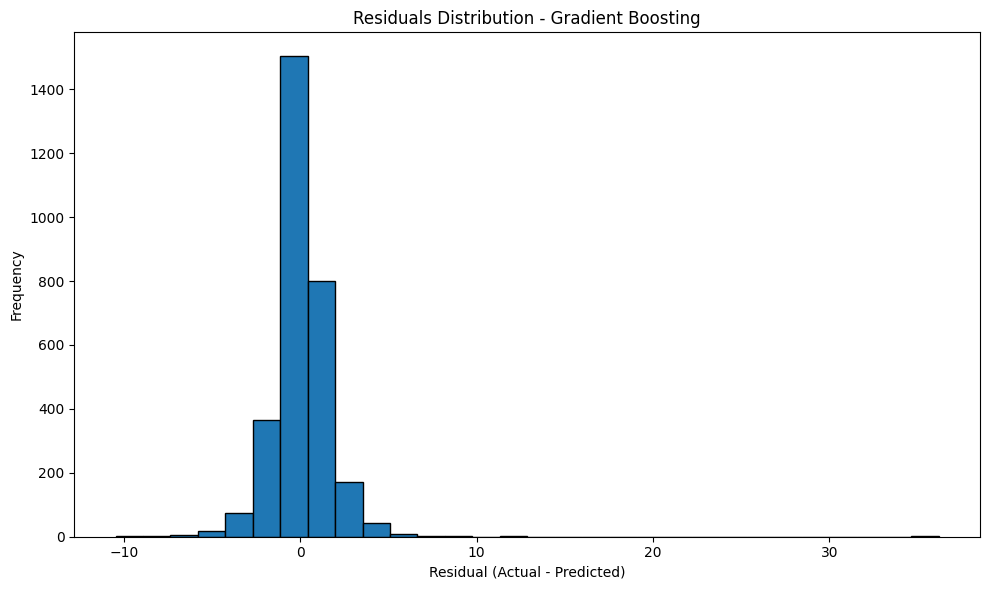

In [13]:
residuals_gb = y_test - gradient_boosting_regressor.predict(X_test_scaled)
plt.figure(figsize=(10, 6))
plt.hist(residuals_gb, bins=30, edgecolor='k')
plt.title("Residuals Distribution - Gradient Boosting")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()




Analyze data points with large residuals to see if they are anomalies or represent patterns not captured by the model.
Enhance the Model:

If the outliers are significant and frequent, consider:
Feature engineering (e.g., creating interaction terms or adding more informative features).
Hyperparameter tuning of the Gradient Boosting model.
Assess Residual Independence:

Plot residuals against predicted values or individual features to check for patterns, which could indicate areas where the model underperforms.
Compare to Other Models:


<Figure size 1600x1000 with 0 Axes>

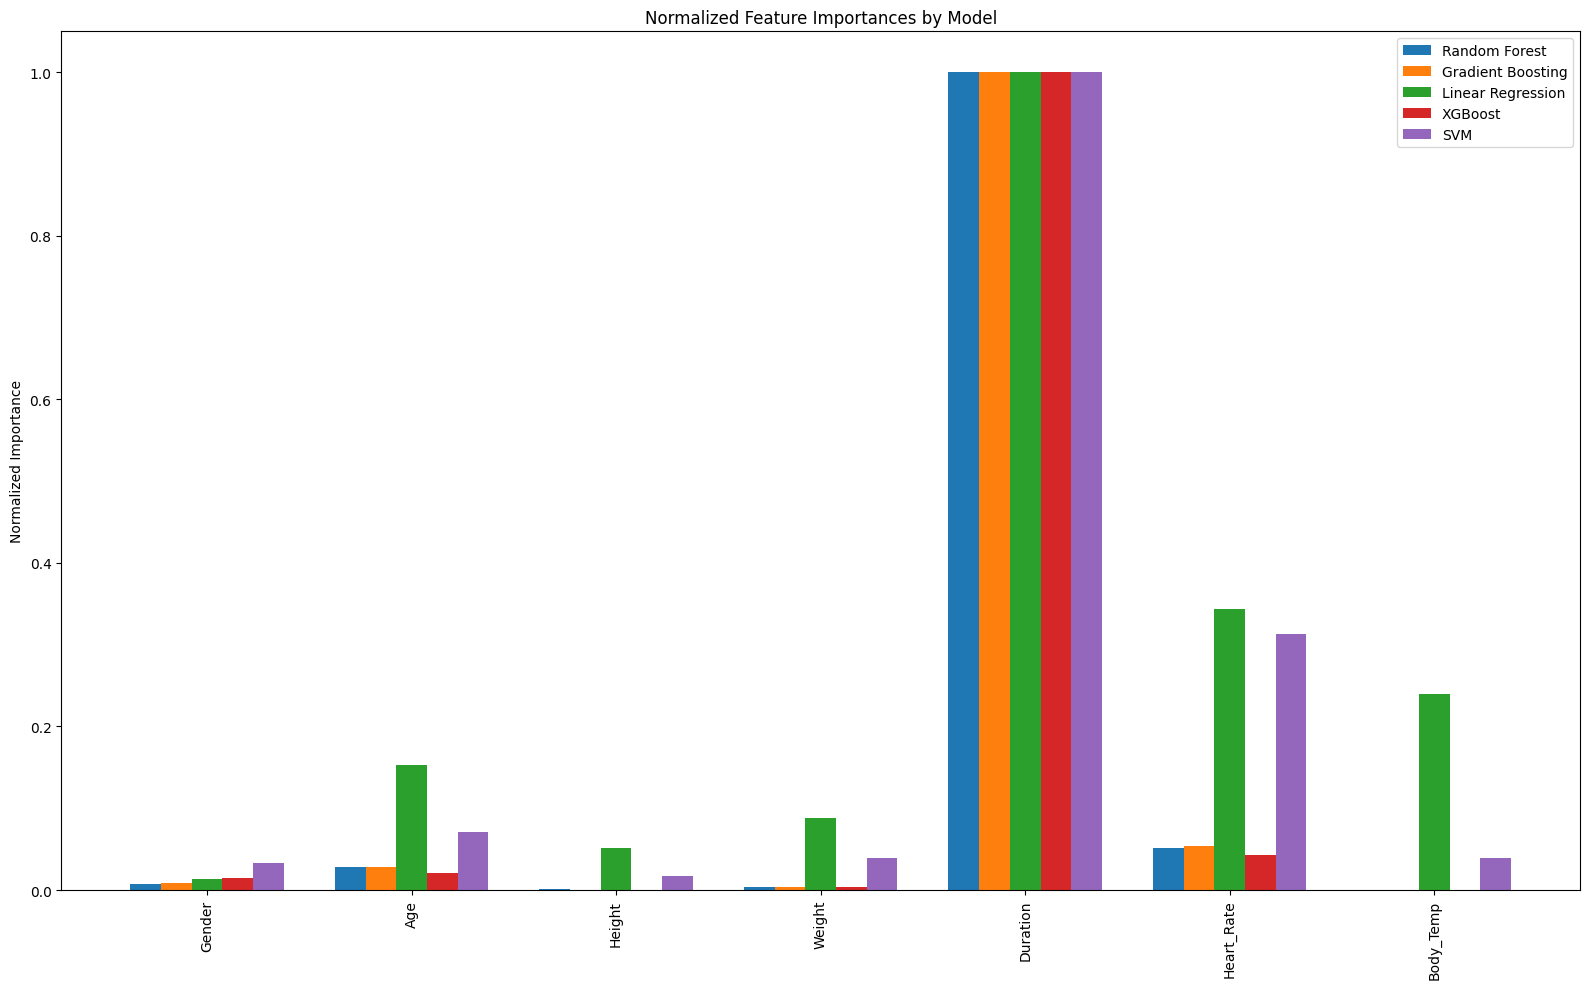

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance

# Feature importance for Random Forest and Gradient Boosting
rf_importances = random_forest_regressor.feature_importances_
gb_importances = gradient_boosting_regressor.feature_importances_

# Feature importance for Linear Regression (absolute coefficients)
linear_importances = np.abs(linear_regressor.coef_)

# Feature importance for XGBoost
xgb_importances = xgboost_regressor.feature_importances_

# Feature importance for SVM using permutation importance (as SVM does not natively provide feature importance)
svm_importance_result = permutation_importance(svm_regressor, X_test_scaled, y_test, scoring="neg_mean_squared_error")
svm_importances = svm_importance_result.importances_mean

# Combine all feature importance values into a single dictionary for plotting
features = X.columns
importance_dict = {
    "Random Forest": rf_importances,
    "Gradient Boosting": gb_importances,
    "Linear Regression": linear_importances,
    "XGBoost": xgb_importances,
    "SVM": svm_importances,
}
normalized_importance_dict = {
    model_name: importances / np.max(importances) for model_name, importances in importance_dict.items()
}
# Plotting
plt.figure(figsize=(16, 10))
bar_width = 0.15
x_positions = np.arange(len(features))

# Plot feature importances for each model
plt.figure(figsize=(16, 10))
for i, (model_name, importances) in enumerate(normalized_importance_dict.items()):
    plt.bar(
        x_positions + i * bar_width, 
        importances, 
        bar_width, 
        label=model_name
    )

# Formatting the plot
plt.xticks(x_positions + bar_width * (len(importance_dict) - 1) / 2, features, rotation=90)
plt.ylabel("Normalized Importance")
plt.title("Normalized Feature Importances by Model")
plt.legend()
plt.tight_layout()
plt.show()


The feature Duration has the highest importance score in the Gradient Boosting model (orange bar). This suggests that exercise duration plays a critical role in predicting the target variable likely calories burned.

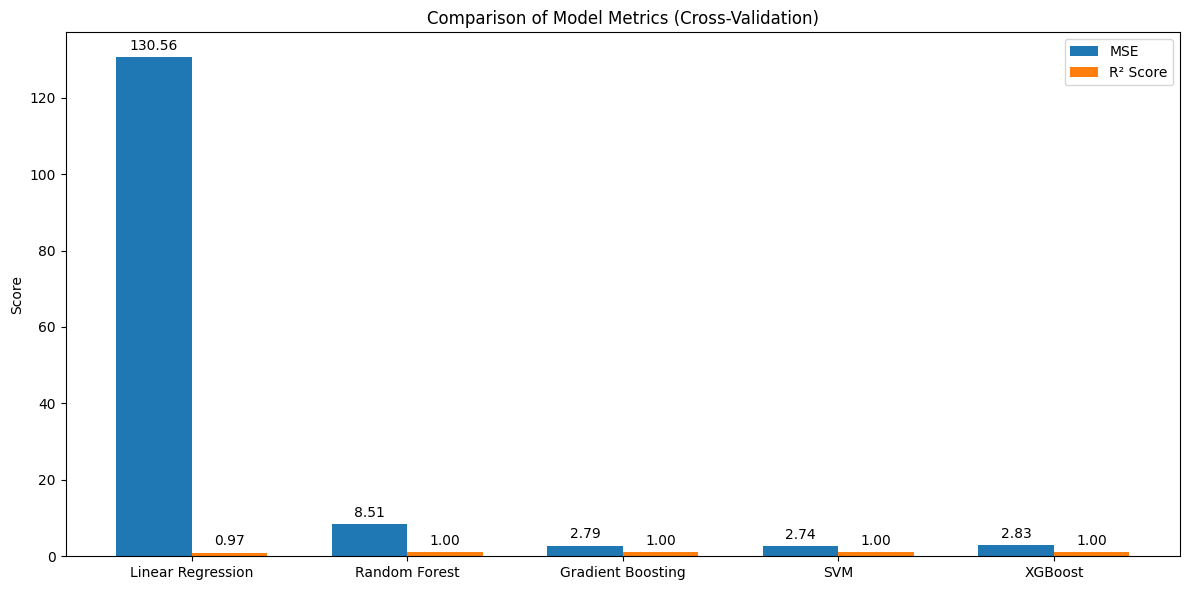

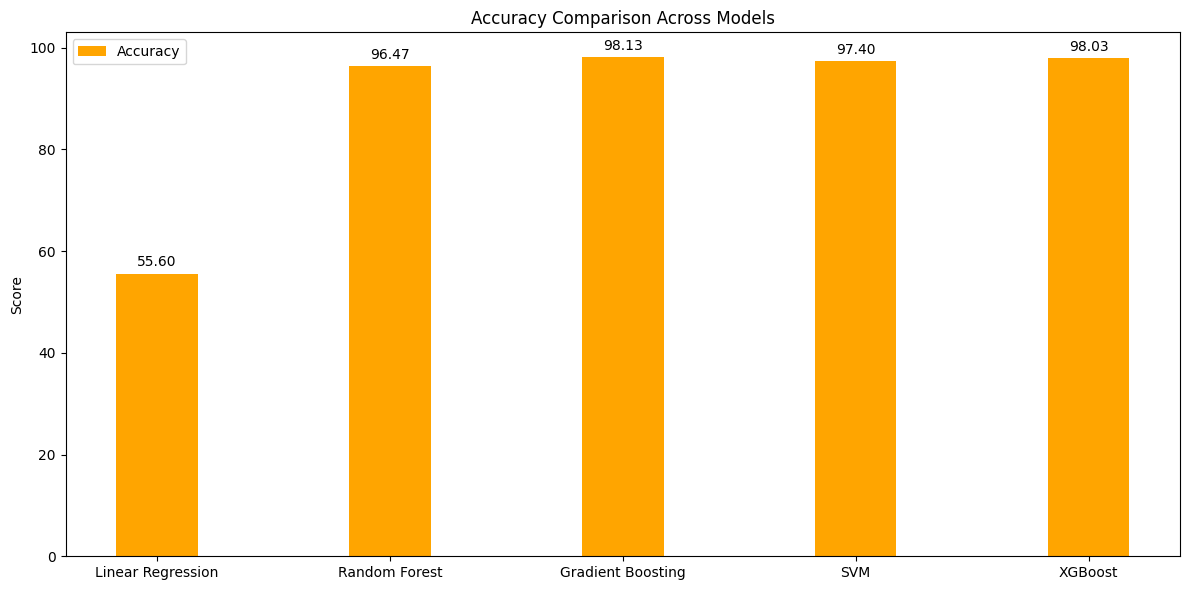

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Provided values
models = ["Linear Regression", "Random Forest", "Gradient Boosting", "SVM", "XGBoost"]
mse_values = mse_values
r2_values = r2_values
accuracy_values = accuracies

# Create bar charts for MSE and R² Score
x = np.arange(len(models))
width = 0.35

# Bar plot for MSE and R²
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width / 2, mse_values, width, label="MSE")
rects2 = ax.bar(x + width / 2, r2_values, width, label="R² Score")

ax.set_ylabel("Score")
ax.set_title("Comparison of Model Metrics (Cross-Validation)")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Annotate bars with values
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f"{height:.2f}", xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha="center", va="bottom")

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

# Bar plot for Accuracy only
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x, accuracy_values, width, label="Accuracy", color='orange')

ax.set_ylabel("Score")
ax.set_title("Accuracy Comparison Across Models")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

autolabel(rects1)

plt.tight_layout()
plt.show()


This indicates that Gradient Boosting outperforms the other models in both mse/r2 and accuracy grah. 

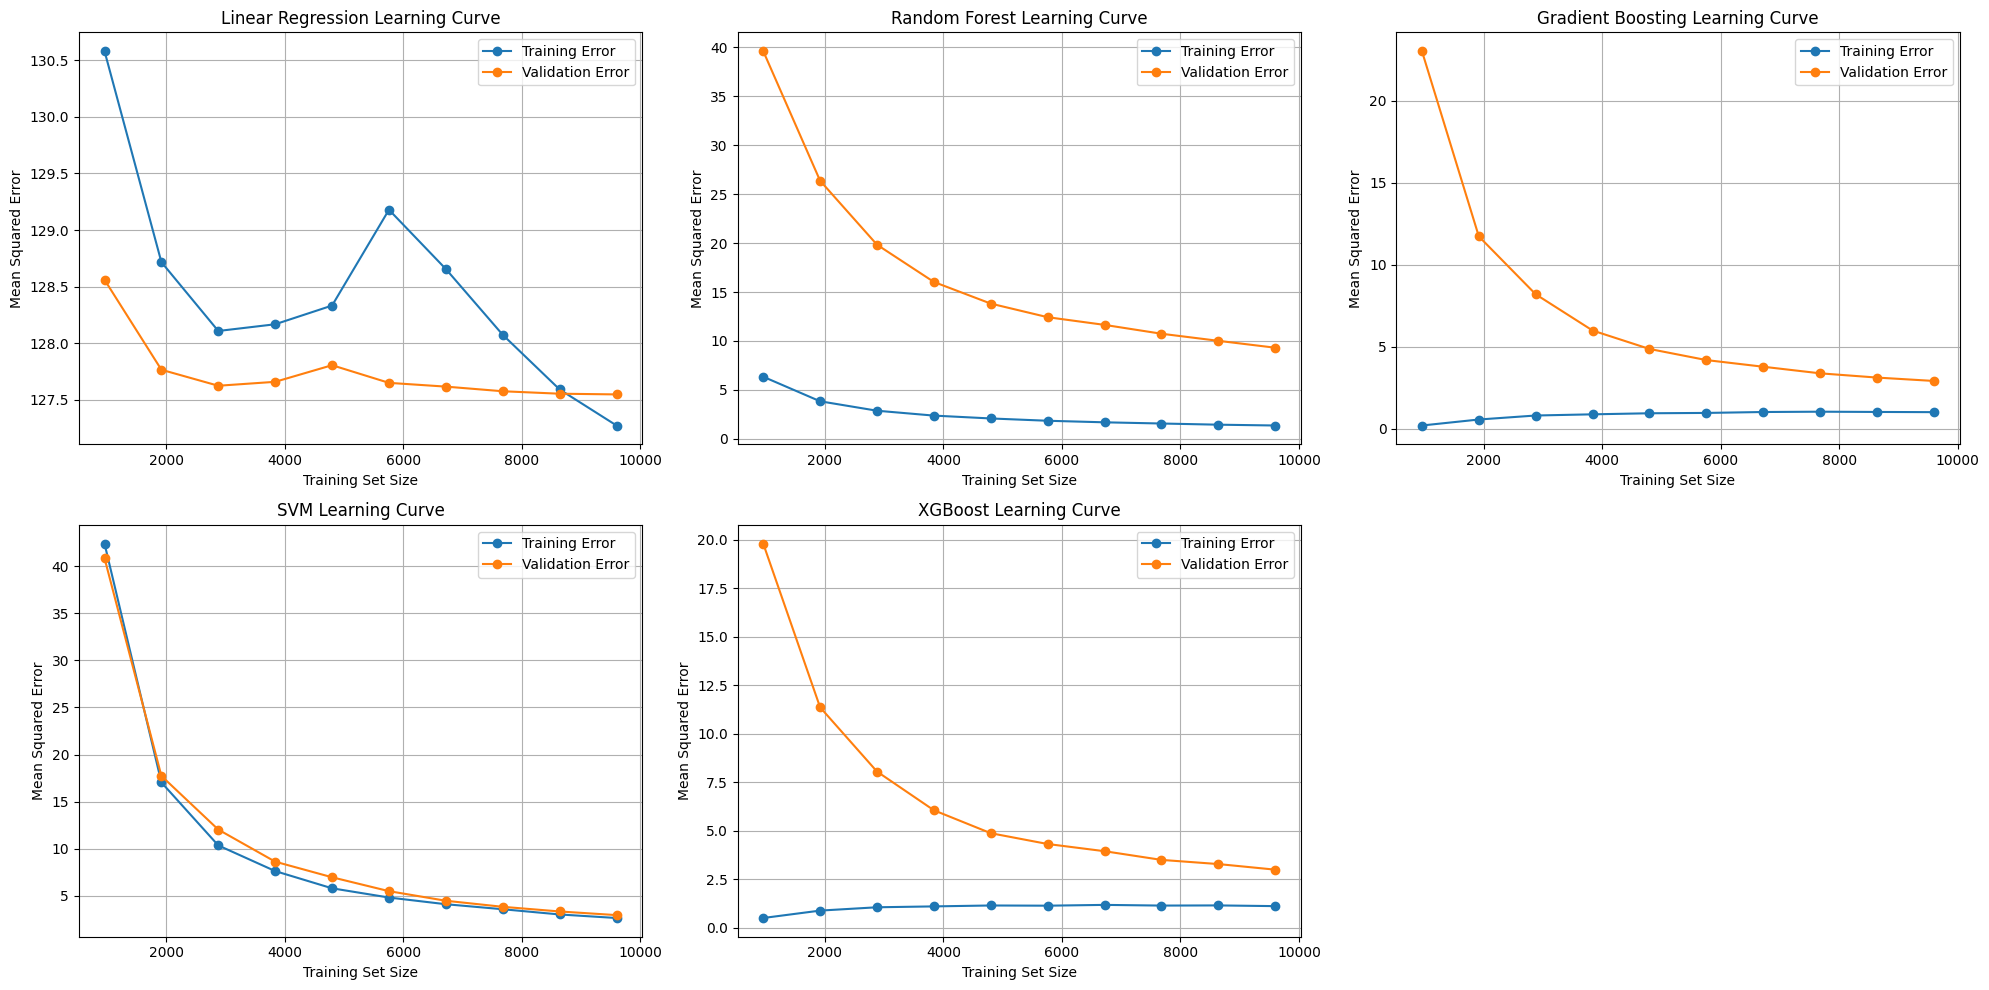

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42),
    "SVM": SVR(kernel="rbf", C=10, epsilon=0.1),
    "XGBoost": XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42),
}

# Learning curve function
def plot_learning_curves(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
    )
    
    # Calculate mean of training and validation errors
    train_scores_mean = -np.mean(train_scores, axis=1)  # Convert negative MSE to positive MSE
    test_scores_mean = -np.mean(test_scores, axis=1)
    
    plt.plot(train_sizes, train_scores_mean, label="Training Error", marker='o')
    plt.plot(train_sizes, test_scores_mean, label="Validation Error", marker='o')
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Mean Squared Error")
    plt.legend(loc="best")
    plt.grid()

# Generate learning curves for each model
plt.figure(figsize=(20, 10))
for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(2, 3, i)  # Arrange in 2 rows and 3 columns for better layout
    plot_learning_curves(model, X_train_scaled, y_train, title=f"{name} Learning Curve")

plt.tight_layout()
plt.show()


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('regressor', GradientBoostingRegressor(
        n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42
    ))  # Final model
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Test the pipeline
y_pred = pipeline.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}, R²: {r2:.2f}")


MSE: 2.79, R²: 1.00


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import set_config

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', GradientBoostingRegressor(
        n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42
    ))
])

# Enable pipeline diagram visualization
set_config(display='diagram')

# Display the pipeline
pipeline


Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 GradientBoostingRegressor(learning_rate=0.05, max_depth=6,
                                           n_estimators=300,
                                           random_state=42))])

Model Comparison:   0%|          | 0/2 [00:00<?, ?it/s]


Running Grid Search for Gradient Boosting...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits

Gradient Boosting Results:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500}
MSE: 1.8447
R²: 0.9995
Accuracy: 98.40%
CV Mean Score: 0.9995 (+/- 0.0001)


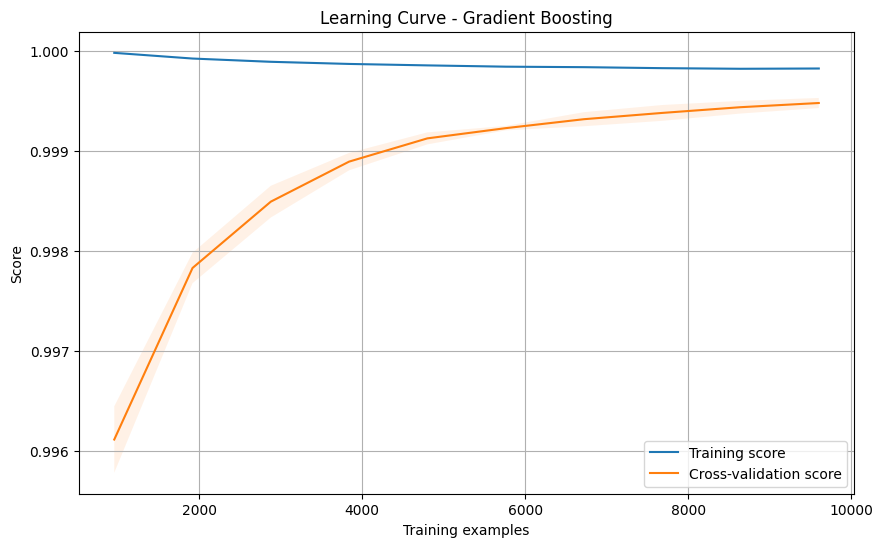

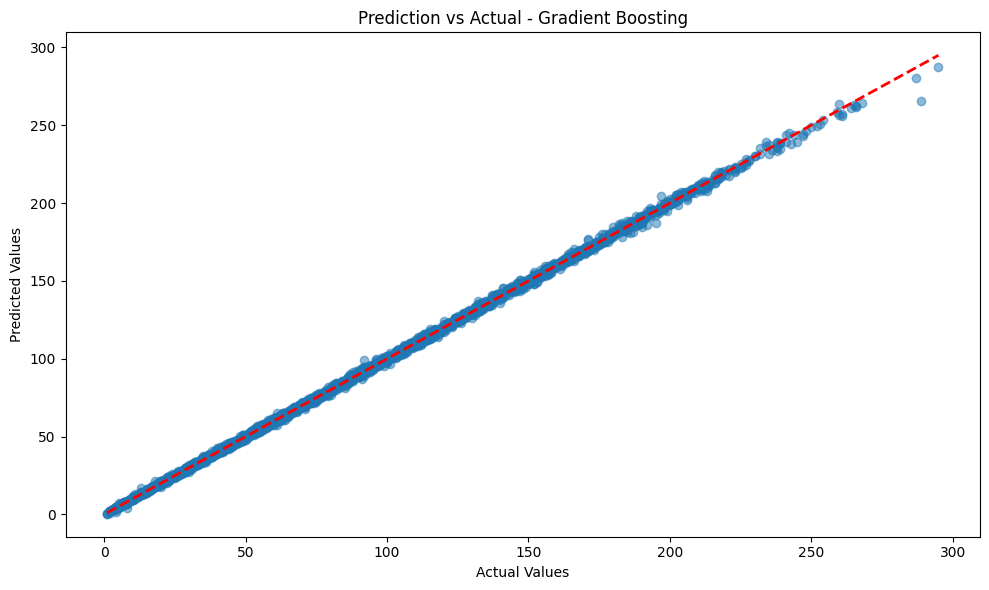

Model Comparison:  50%|█████     | 1/2 [06:19<06:19, 379.87s/it]


Running Grid Search for XGBoost...
Fitting 5 folds for each of 972 candidates, totalling 4860 fits

XGBoost Results:
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 500, 'subsample': 0.8}
MSE: 1.8835
R²: 0.9995
Accuracy: 98.30%
CV Mean Score: 0.9995 (+/- 0.0001)


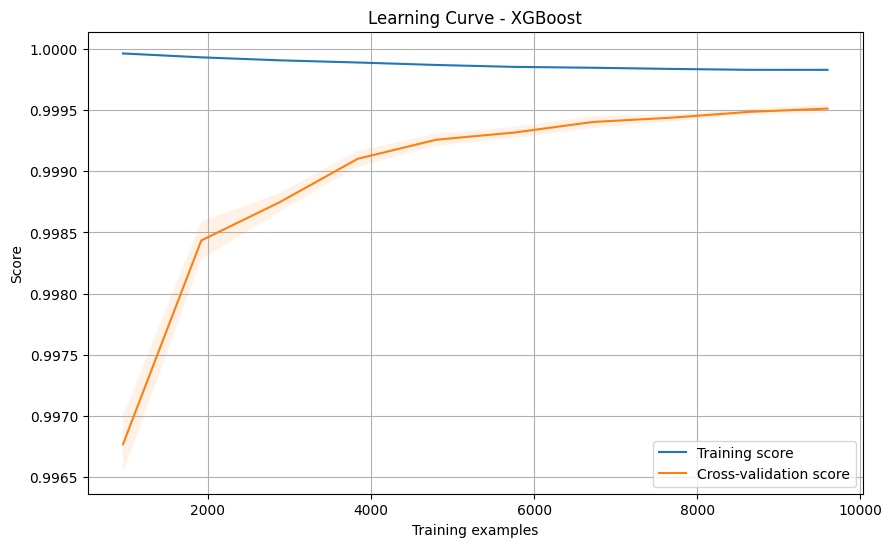

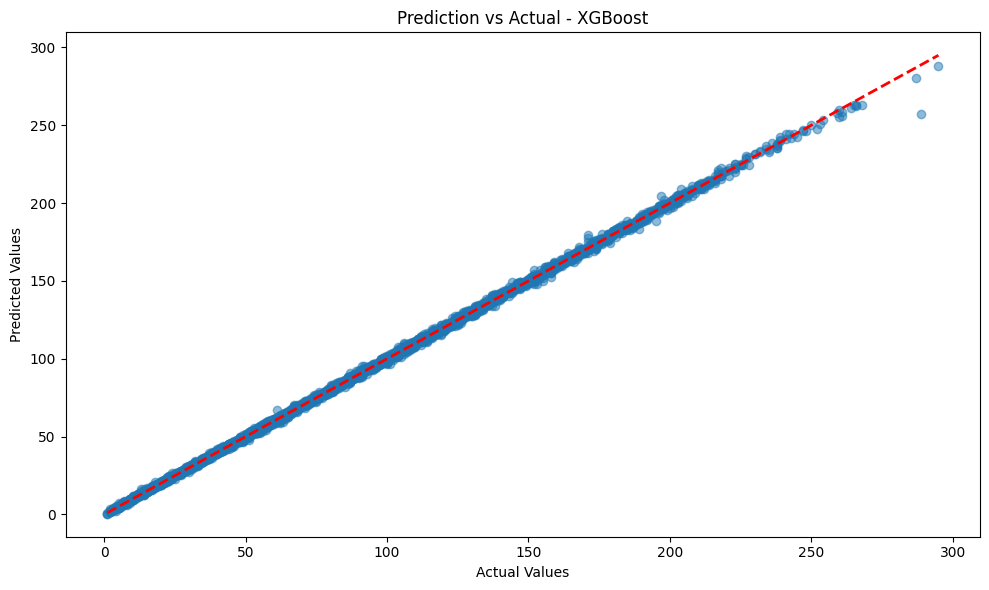

Model Comparison: 100%|██████████| 2/2 [15:57<00:00, 478.97s/it]


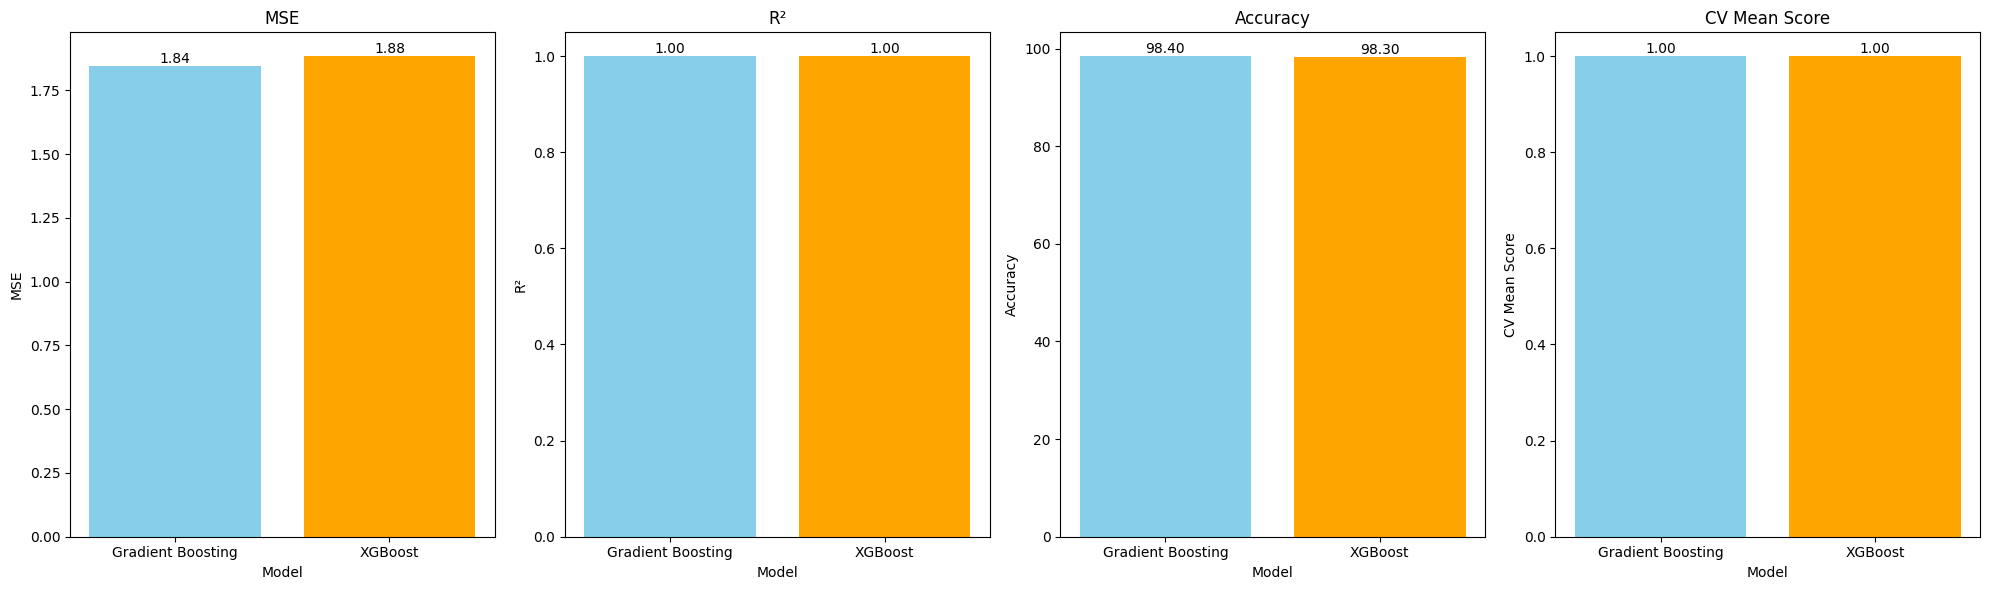


Detailed Comparison Results:
               Model                                                                                                                            Best Parameters       MSE        R²  Accuracy  CV Mean Score    CV Std
0  Gradient Boosting                                 {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500}  1.844704  0.999524      98.4       0.999478  0.000050
1            XGBoost  {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 500, 'subsample': 0.8}  1.883480  0.999514      98.3       0.999519  0.000034
Saved best model for Gradient Boosting to gradient_boosting_best_model.pkl
Saved best model for XGBoost to xgboost_best_model.pkl


In [19]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from tqdm import tqdm
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from joblib import parallel_backend
import gc
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

def calculate_accuracy(y_true, y_pred, threshold=0.1):
    """
    Calculate accuracy within a threshold
    """
    within_threshold = np.abs(y_true - y_pred) <= threshold * np.abs(y_true)
    return np.mean(within_threshold) * 100

def plot_learning_curve(estimator, title, X, y):
    """
    Plot learning curve for an estimator
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10))
    
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean, label="Training score")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.plot(train_sizes, test_mean, label="Cross-validation score")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
    plt.grid()
    plt.legend(loc="best")
    return plt

# Define parameter grid
param_grid = {
    'GradientBoostingRegressor': {
        'n_estimators': [100, 300, 500],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
    },
    'XGBRegressor': {
        'n_estimators': [100, 300, 500],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'gamma': [0, 0.1, 0.2]
    }
}

# Define models
models = {
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(
        random_state=42,
        use_label_encoder=False,
        eval_metric='rmse'
    )
}

results = []
best_models = {}

# Perform grid search for both models with progress bar
for model_name, model in tqdm(models.items(), desc="Model Comparison"):
    try:
        print(f"\nRunning Grid Search for {model_name}...")
        
        # Select appropriate parameter grid
        current_param_grid = param_grid['XGBRegressor'] if 'XGB' in model_name else param_grid['GradientBoostingRegressor']
        
        with parallel_backend('threading', n_jobs=-1):
            grid_search = GridSearchCV(
                estimator=model,
                param_grid=current_param_grid,
                scoring='neg_mean_squared_error',
                cv=5,
                n_jobs=-1,
                verbose=1
            )
            
            # Different fitting approach for XGBoost
            if 'XGB' in model_name:
                grid_search.fit(
                    X_train, 
                    y_train,
                    eval_set=[(X_test, y_test)],
                    verbose=False
                )
            else:
                grid_search.fit(X_train, y_train)
        
        best_model = grid_search.best_estimator_
        best_models[model_name] = best_model

        # Evaluate on test set
        y_pred = best_model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        accuracy = calculate_accuracy(y_test, y_pred)
        
        # Calculate cross-validation scores
        cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)

        results.append({
            "Model": model_name,
            "Best Parameters": grid_search.best_params_,
            "MSE": mse,
            "R²": r2,
            "Accuracy": accuracy,
            "CV Mean Score": cv_scores.mean(),
            "CV Std": cv_scores.std()
        })

        print(f"\n{model_name} Results:")
        print(f"Best Parameters: {grid_search.best_params_}")
        print(f"MSE: {mse:.4f}")
        print(f"R²: {r2:.4f}")
        print(f"Accuracy: {accuracy:.2f}%")
        print(f"CV Mean Score: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")

        # Plot learning curve
        plot_learning_curve(best_model, f'Learning Curve - {model_name}', X_train, y_train)
        plt.show()


        # Prediction vs Actual scatter plot
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title(f'Prediction vs Actual - {model_name}')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error during {model_name} training: {str(e)}")
    
    finally:
        # Clean up memory
        del grid_search
        gc.collect()

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Visualization of metrics
metrics = ["MSE", "R²", "Accuracy", "CV Mean Score"]
plt.figure(figsize=(20, 6))
for i, metric in enumerate(metrics):
    plt.subplot(1, 4, i + 1)
    bars = plt.bar(results_df["Model"], results_df[metric], color=["skyblue", "orange"])
    plt.title(metric)
    plt.ylabel(metric)
    plt.xlabel("Model")
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Detailed Comparison Results
print("\nDetailed Comparison Results:")
print(results_df.to_string())

# Save the best model pipelines
for model_name, model in best_models.items():
    filename = f"{model_name.replace(' ', '_').lower()}_best_model.pkl"
    try:
        with open(filename, "wb") as file:
            pickle.dump(model, file)
        print(f"Saved best model for {model_name} to {filename}")
    except Exception as e:
        print(f"Error saving {model_name}: {str(e)}")

In [20]:
results_df

,Model,Best Parameters,MSE,R²,Accuracy,CV Mean Score,CV Std
0,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 5, 'min_sa...",1.844704,0.999524,98.4,0.999478,0.000050
1,XGBoost,"{'colsample_bytree': 1.0, 'gamma': 0, 'learnin...",1.883480,0.999514,98.3,0.999519,0.000034
